In [11]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

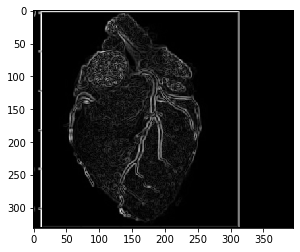

In [12]:
#read the image in gray scale
img = cv2.imread('original.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [13]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [14]:
#define kernal convolution function
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [15]:
#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

In [16]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

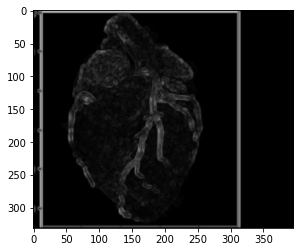

In [17]:
#output images
cv2.imwrite('original.png', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()